# 202131148_Alexandro Nesta

# Decision Tree

In [1]:
#Import Library
import pandas as pd

In [2]:
# dataset_K04 Untuk menyimpan data dalam DataFrame pandas
# pd.read_csv digunakan untuk membaca file CSV bernama ‘K04_bank_customers.csv’
# sep=";" digunakan sebagai pemisah antar kolom dalam file csv 
dataset_K04 = pd.read_csv('K04_bank_customers.csv', sep=";")

In [3]:
# Untuk menampilkan dataset
dataset_K04

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
#Untuk menampilkan informasi tentang dataset
dataset_K04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Preprocessing data

In [5]:
# Import kelas LabelEncoder dari modul preprocessing yang ada di pustaka sklearn.
from sklearn.preprocessing import LabelEncoder

# Mengubah value kolom yang bertipe data string atau objek menjadi numerik
for col in ['job','marital','education','default','housing','loan','contact','month','poutcome','y']:
        label_encoder = LabelEncoder()
        dataset_K04[col]=label_encoder.fit_transform(dataset_K04[col])

In [6]:
dataset_K04

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [7]:
#Memisahkan kolom target (y) dari dataset
x = dataset_K04.drop('y', axis = 1)
y = dataset_K04['y']

In [8]:
#Splitting Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [9]:
# Import kelas DecisionTreeClassifier dari modul tree yang ada di pustaka sklearn
from sklearn.tree import DecisionTreeClassifier

# Untuk membuat instance dari kelas DecisionTreeClassifier dengan kedalaman maksimum pohon keputusan sebesar 3 tingkat
modelDT = DecisionTreeClassifier(max_depth = 3)
# Untuk melatih model modelDT menggunakan data pelatihan x_train dan label pelatihan y_train
modelDT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
#Testinng model untuk melakukan presiksi
hasil_prediksi_dt = modelDT.predict(x_test)

In [11]:
# Cek keakurasian Model
# Import fungsi accuracy_score dari modul metrics yang ada di pustaka sklearn.
from sklearn.metrics import accuracy_score

# Untuk mencetak akurasi model ke layar.
# Fungsi accuracy_score dipanggil dengan dua argumen: y_test dan hasil_prediksi_dt.
# y_test adalah label sebenarnya dari data pengujian, dan hasil_prediksi_dt adalah prediksi yang dibuat oleh model
# Hasil dari accuracy_score dikalikan dengan 100 untuk mengubahnya menjadi persentase

print("Akurasi Model:" , accuracy_score(y_test, hasil_prediksi_dt)*100)

Akurasi Model: 89.26570333235034


# Visualisasi Model Decision Tree

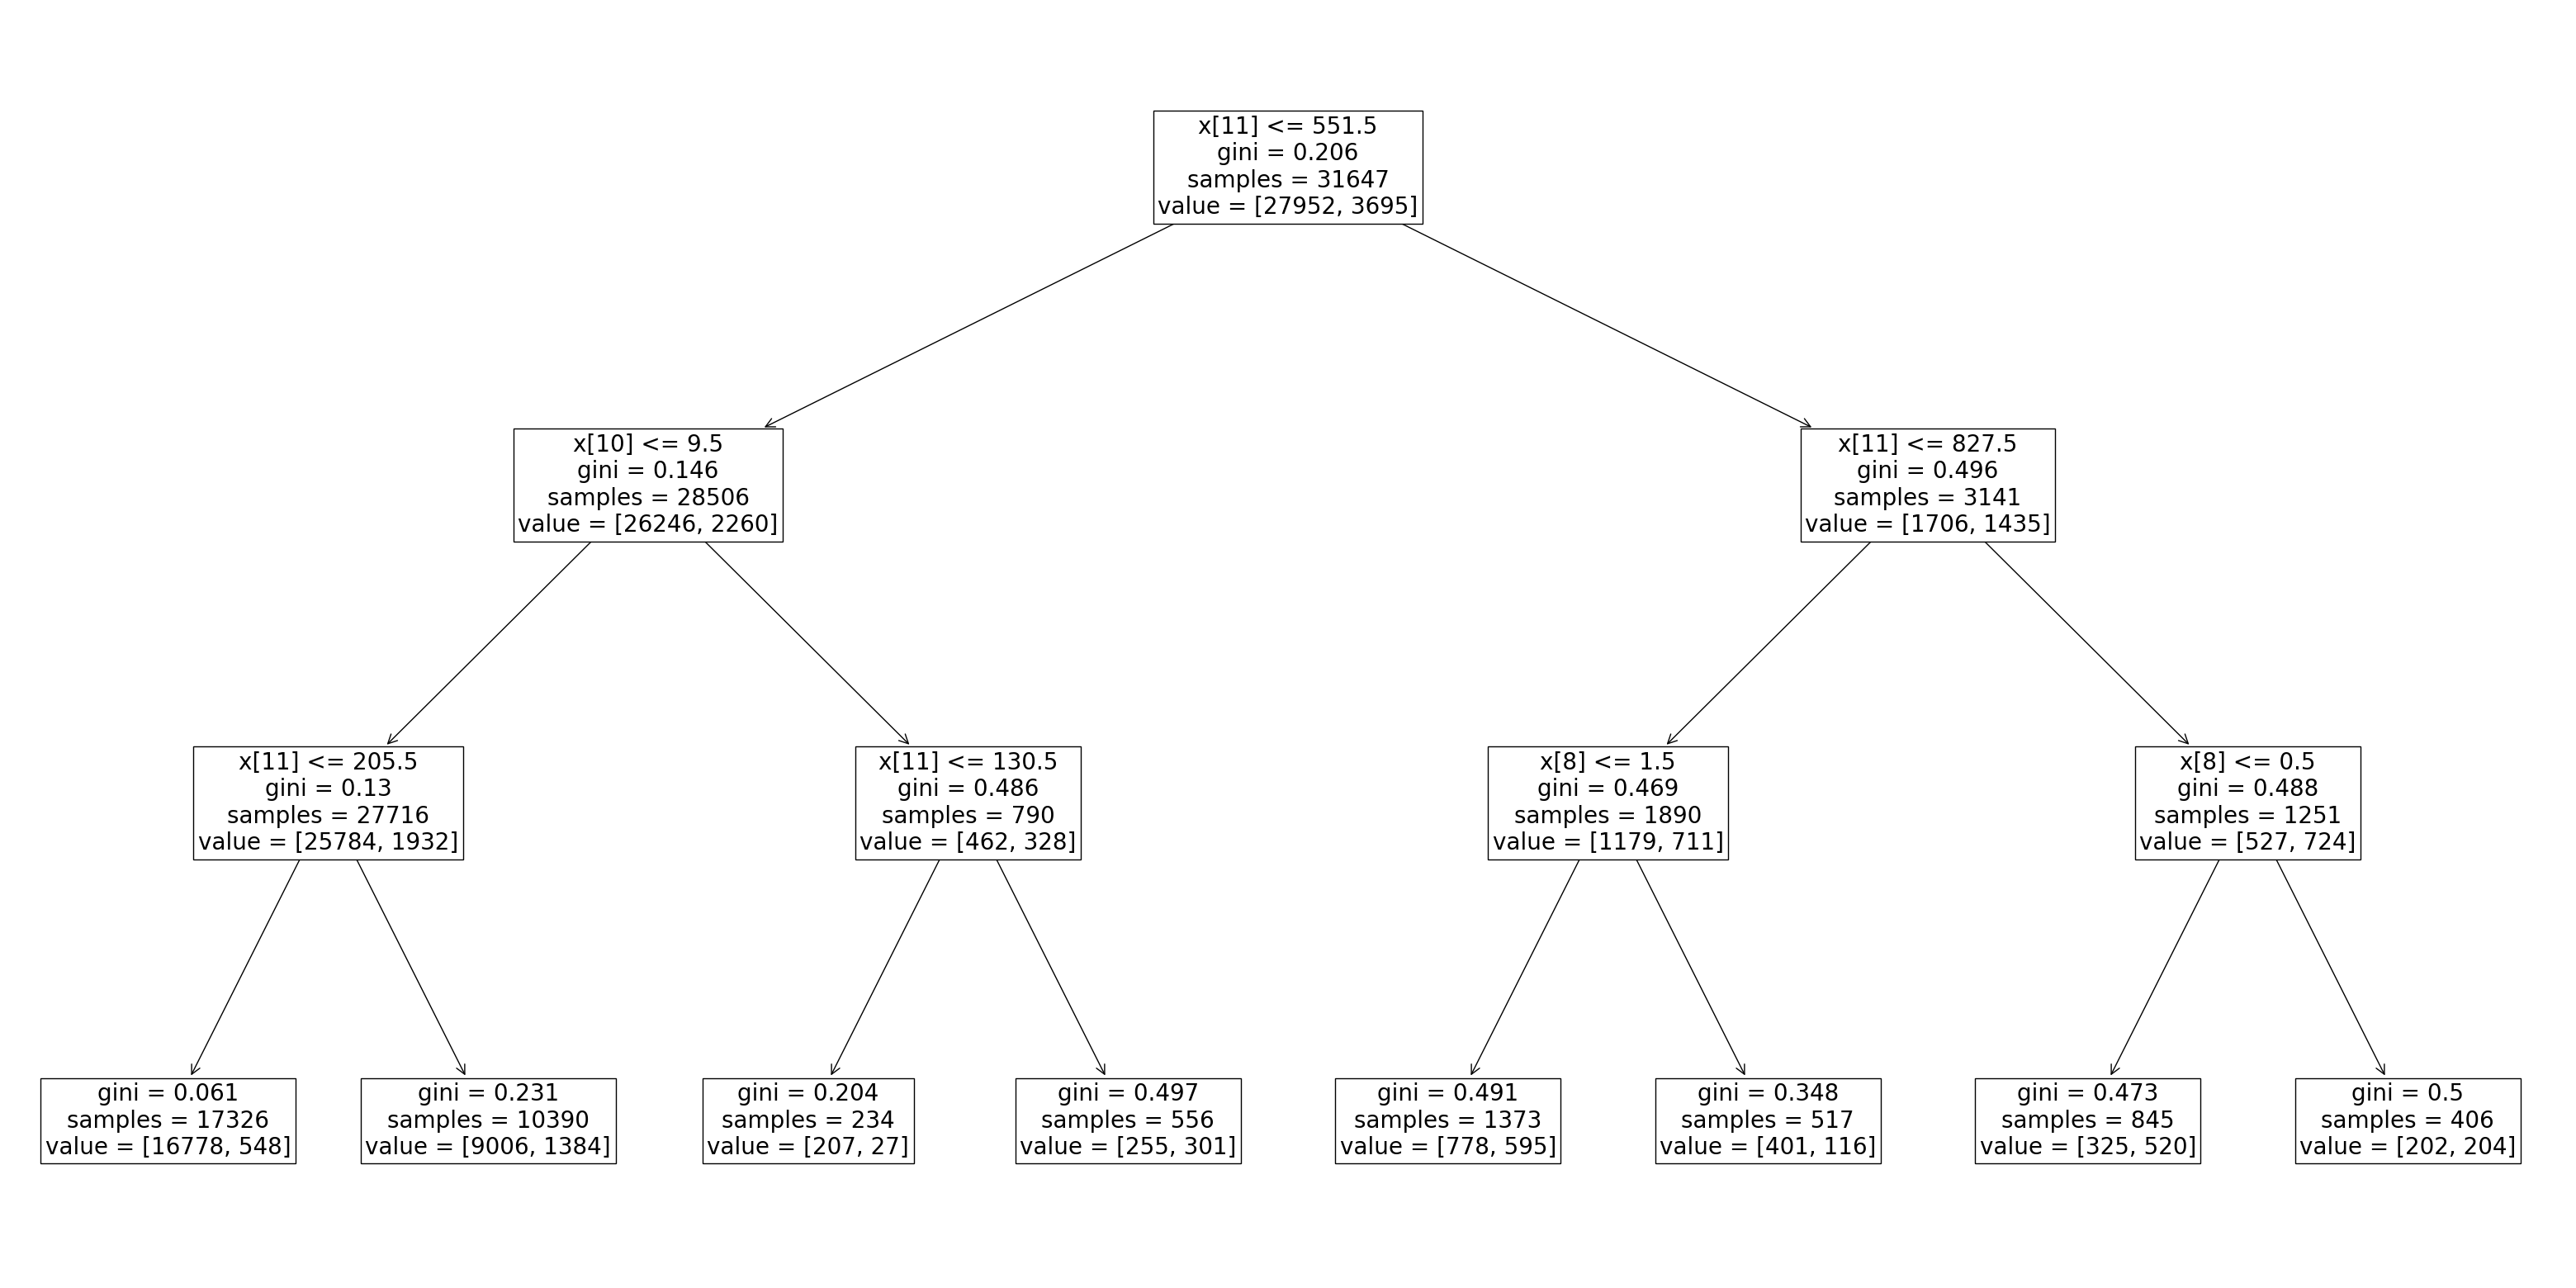

In [12]:
# Import fungsi plot_tree dari modul tree yang ada di pustaka sklearn
from sklearn.tree import plot_tree

# Import Library "matplotlib.pyplot" dan diinisilisasikan menjadi "plt" untuk mengolah data
import matplotlib.pyplot as plt

# figsize digunakan untuk menentukan lebar dan tinggi gambar dalam inci
plt.subplots(figsize = (40,20)) 
# untuk memvisualisasikan pohon keputusan dari model modelDT dengan ukuran font 20
plot_tree(modelDT, fontsize = 20) 
# untuk menampilkan gambar yang telah dibuat
plt.show() 